In [9]:
%load_ext autoreload
%autoreload 2

import torch
from torch import nn
import gin
from DataUtils.Getdata import GetDataSets
from DataUtils.Getdata import ModuleTest
from Models.LineairModelCollection import CNN
import Models.LineairModelCollection

print(torch.version.cuda)
gin.enter_interactive_mode()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
11.3


In [10]:
gin.parse_config_file("config.gin")

In [11]:
# testing gin
from Models.LineairModelCollection import TestGin
TestGin()

PLEASE DO SOMETHING ELSE!!!!!!!!


In [12]:
ModuleTest()

Wat doet python als we iets veranderen?!?!?!


In [13]:
torch.cuda.is_available()

True

In [14]:

# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"

In [15]:
batch_size=64
train_dataloader,test_dataloader = GetDataSets(batch_size, device)

In [16]:
train_dataloader.dataset
type(train_dataloader.dataset)

torchvision.datasets.mnist.FashionMNIST

In [17]:
from Models.LineairModelCollection import CNN  
model = CNN().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()
 
#RunTrainer(model=model, 
#           train_dataloader=train_dataloader,
#           test_dataloader=test_dataloader,
#           learning_rate=globaLlr,
#           epochs=globalEpochs,
#           optimizer=adamOpt,
#           loss_fn=lossCross,
#           eval_steps=3,
#           device=device,
#           )

CNN(
  (convolutions): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=10, bias=True)
  )
)


CrossEntropyLoss()

In [18]:
X, y = next(iter(train_dataloader))
X.shape, y.shape

flat = nn.Flatten()
z = flat(X)
z.shape

torch.Size([64, 784])

In [19]:
img = X[0]
img.shape

torch.Size([1, 28, 28])

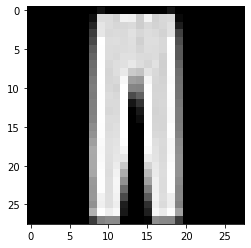

In [20]:
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap="gray")

In [21]:
globaLlr = 0.02
globalEpochs = 50
globalsteps = 5

In [22]:
from Models.LineairModelCollection import BRBSequentialLow  

model = BRBSequentialLow().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBSequentialLow\\'
           )

2022-05-19 10:19:29.844 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBSequentialLow\20220519-1019


BRBSequentialLow(
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=392, bias=True)
    (2): ReLU()
    (3): Linear(in_features=392, out_features=10, bias=True)
  )
)
..\trained_models\BRBSequentialLow
Epoch : 0 - train loss =0.013910515962541104
testloss :0.009870050164560476 -  test accuracy :0.7708333730697632
Epoch : 1 - train loss =0.0086401983131965
testloss :0.007847884204238653 -  test accuracy :0.8177083730697632
Epoch : 2 - train loss =0.007717151198536157
testloss :0.007241103332489729 -  test accuracy :0.828125
Epoch : 3 - train loss =0.007259707036117713
testloss :0.007548683788627386 -  test accuracy :0.8333333730697632
Epoch : 4 - train loss =0.006919045555839936
testloss :0.007415957283228636 -  test accuracy :0.828125
Epoch : 5 - train loss =0.006681105754772822
testloss :0.009763753662506739 -  test accuracy :0.7552083730697632
Epoch : 6 - train loss =0.006480227420727412
testloss :0.006004611340661843 -  te

In [23]:
from Models.LineairModelCollection import BRBSequentialHigh  

model = BRBSequentialHigh().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBSequentialHigh\\'
           )

2022-05-19 10:25:42.557 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBSequentialHigh\20220519-1025


BRBSequentialHigh(
  (dense): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=784, bias=True)
    (2): ReLU()
    (3): Linear(in_features=784, out_features=784, bias=True)
    (4): ReLU()
    (5): Linear(in_features=784, out_features=784, bias=True)
    (6): ReLU()
    (7): Linear(in_features=784, out_features=784, bias=True)
    (8): ReLU()
    (9): Linear(in_features=784, out_features=784, bias=True)
    (10): ReLU()
    (11): Linear(in_features=784, out_features=784, bias=True)
    (12): ReLU()
    (13): Linear(in_features=784, out_features=392, bias=True)
    (14): ReLU()
    (15): Linear(in_features=392, out_features=10, bias=True)
  )
)
..\trained_models\BRBSequentialHigh
Epoch : 0 - train loss =0.035985493286450704
testloss :0.035940914104382195 -  test accuracy :0.1145833358168602
Epoch : 1 - train loss =0.03582356862624486
testloss :0.03502980122963587 -  test accuracy :0.3958333432674408
Epoch : 2 - train loss =0.02329303823

In [25]:
from Models.LineairModelCollection import BRBSequentialVariable

model = BRBSequentialVariable().to(device)
model.cuda()
print(model)

from Training.trainer import RunTrainer
import torch.optim as optim
adamOpt = optim.Adam
lossCross = torch.nn.CrossEntropyLoss()
lossCross.cuda()

RunTrainer(model=model, 
           train_dataloader=train_dataloader,
           test_dataloader=test_dataloader,
           learning_rate=globaLlr,
           epochs=globalEpochs,
           optimizer=adamOpt,
           loss_fn=lossCross,
           eval_steps=3,
           device=device,
           log_dir='..\\trained_models\\BRBSequentialVariable\\'
           )

2022-05-19 10:39:18.867 | INFO     | Training.trainer:RunTrainer:71 - Logging to ..\trained_models\BRBSequentialVariable\20220519-1039


BRBSequentialVariable(
  (lin): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=392, bias=True)
    (2): ReLU()
    (3): Linear(in_features=392, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=10, bias=True)
  )
)
..\trained_models\BRBSequentialVariable
Epoch : 0 - train loss =0.020238319760064283
testloss :0.012190469540655613 -  test accuracy :0.7447916865348816
Epoch : 1 - train loss =0.009823109410703182
testloss :0.009818113098541895 -  test accuracy :0.7604166865348816
Epoch : 2 - train loss =0.008150520510723194
testloss :0.010612791714568933 -  test accuracy :0.71875
Epoch : 3 - train loss =0.0074335506250460944
testloss :0.00871768438567718 -  test accuracy :0.7916666865348816
Epoch : 4 - train loss =0.006866259005665779
testloss :0.007634640360871951 -  test accuracy :0.84375
Epoch : 5 - train loss =0.006522